CS364 - Machine Learning
<br>
**Written by:**
<br>
Shoug Ali Alsuhaibani   440022732 
<br>
Sara Khalid Alaradi     440023365
<br> 
**Supervised by:** Dr. Wojdan BinSaeedan

# Naïve Bayes for DDoS Detection
Naive Bayes methods are a set of supervised learning algorithms, and uesd as a classification technique which is based on applying Bayes’ theorem with the “naive” assumption of conditional independence between 
every pair of features given the value of the class variable.
<br>
<br>
This is an implementation for detecting DDoS attacks; the list of features considered was obtained from [_Wani et al._](https://ieeexplore.ieee.org/abstract/document/8701238) . 
<br>
The dataset was obtained from Kaggle, which can be found [here](https://www.kaggle.com/datasets/devendra416/ddos-datasets).



## Importing essential packages

In [1]:
import ipaddress                                                                   # converting the IP address form Strings to int
import seaborn as sn                                                               # for data visualisation         
import pandas as pd                                                                # data analysis and manipulation
import matplotlib.pyplot as plt                                                    # for data visualisation  
from matplotlib.pyplot import figure                                               # for data visualisation  
from sklearn.model_selection import train_test_split                               # for splitting the data set
from sklearn.naive_bayes import GaussianNB                                         # building the model
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix,precision_score,recall_score,plot_precision_recall_curve
                                                                                   # analysis of the results


## Preparing the Data
In this section, the dataset was imported, and several feature types were converted. 

In [2]:
# Import Dataset 
balance_data = pd.read_csv('Data/final_dataset.csv')      
balance_data

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794622,1725894,172.31.67.50-209.85.203.113-53598-80-6,209.85.203.113,80,172.31.67.50,53598,6,20/02/2018 05:14:52,50,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
12794623,5681778,172.31.69.17-108.174.10.14-54599-443-6,172.31.69.17,54599,108.174.10.14,443,6,20/02/2018 03:08:35,306,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
12794624,6395326,172.31.0.2-172.31.65.49-53-61087-17,172.31.65.49,61087,172.31.0.2,53,17,20/02/2018 01:03:19,362,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
12794625,4926899,172.31.0.2-172.31.67.58-53-61580-17,172.31.67.58,61580,172.31.0.2,53,17,20/02/2018 12:43:11,303,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [3]:
# find the dtypes of the features
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std       float64
 25  Flow IAT Max    

In [4]:
# extract the important features and convert Src IP and Dst IP from objects to strings 
balance_data = balance_data[['Flow Duration','Src IP','Src Port','Dst IP','Dst Port','Tot Fwd Pkts','Init Bwd Win Byts','Protocol','Label']]
balance_data = balance_data.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 
balance_data

,Flow Duration,Src IP,Src Port,Dst IP,Dst Port,Tot Fwd Pkts,Init Bwd Win Byts,Protocol,Label
0,3974862,192.168.4.118,4504,203.73.24.75,80,29,5840,6,ddos
1,63,192.168.4.118,4504,203.73.24.75,80,1,17520,6,ddos
2,476078,192.168.4.118,4505,203.73.24.75,80,2,5840,6,ddos
3,151,192.168.4.118,4505,203.73.24.75,80,2,17520,6,ddos
4,472507,192.168.4.118,4506,203.73.24.75,80,2,5840,6,ddos
...,...,...,...,...,...,...,...,...,...
12794622,50,209.85.203.113,80,172.31.67.50,53598,1,255,6,Benign
12794623,306,172.31.69.17,54599,108.174.10.14,443,3,-1,6,Benign
12794624,362,172.31.65.49,61087,172.31.0.2,53,1,-1,17,Benign
12794625,303,172.31.67.58,61580,172.31.0.2,53,1,-1,17,Benign


In [5]:
# check  the dtypes of the features after converting  
balance_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Flow Duration      int64 
 1   Src IP             string
 2   Src Port           int64 
 3   Dst IP             string
 4   Dst Port           int64 
 5   Tot Fwd Pkts       int64 
 6   Init Bwd Win Byts  int64 
 7   Protocol           int64 
 8   Label              string
dtypes: int64(6), string(3)
memory usage: 878.5 MB


In [6]:
# check  for null values in the features  
balance_data.isnull().sum()

Flow Duration        0
Src IP               0
Src Port             0
Dst IP               0
Dst Port             0
Tot Fwd Pkts         0
Init Bwd Win Byts    0
Protocol             0
Label                0
dtype: int64

In [7]:
# top 10 IP addresses with DDoS label
Selected_data=balance_data.loc[balance_data['Label'] == 'ddos'] # row with DDoS label
#print(Selected_data['Src IP'].value_counts().nlargest(10))
IPcount=Selected_data['Src IP'].value_counts().nlargest(10).tolist() # times of appearance 
IPs=Selected_data['Src IP'].value_counts()[:10].index.tolist() # the IP 
#print(IPcount)
#print(IPs)

In [8]:
# convert Src IP and Dst IP from strings to int so the classifier can handle it
balance_data['Src IP'] = balance_data['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
balance_data['Dst IP'] = balance_data['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [9]:
# check  the dtypes of the features after converting
balance_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Flow Duration      int64 
 1   Src IP             int64 
 2   Src Port           int64 
 3   Dst IP             int64 
 4   Dst Port           int64 
 5   Tot Fwd Pkts       int64 
 6   Init Bwd Win Byts  int64 
 7   Protocol           int64 
 8   Label              string
dtypes: int64(8), string(1)
memory usage: 878.5 MB


## Data Analysis 
In this section, we tested the independence of the variables and investigated the proportion of DDoS and benign labels in the data set.

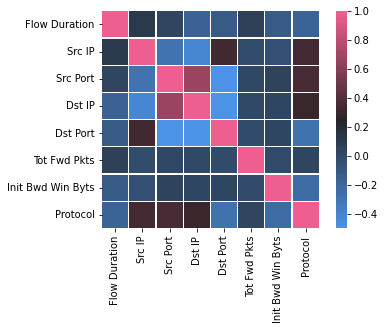

In [10]:
#independent variable Check 
corr = balance_data.iloc[:,:-1].corr(method="pearson")
cmap = sn.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sn.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

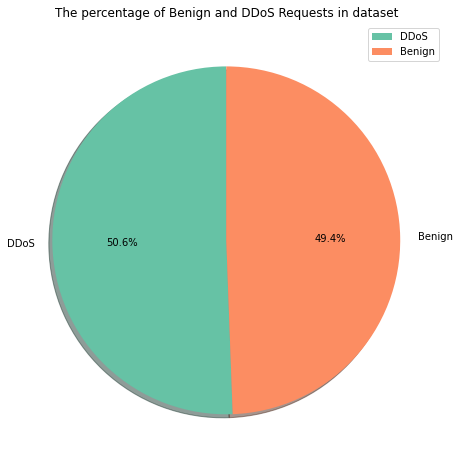

In [11]:

Label = ['DDoS','Benign']
sizes = [balance_data['Label'].value_counts()['ddos'], balance_data['Label'].value_counts()['Benign']]
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")
plt.pie(sizes, labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

## Building Naïve Bayes model
In this section, we constructed **classifier** based on Gaussian after partitioning the data into train and test with a test size of 20%.

In [12]:
# Separating the target variable 
X = balance_data.drop(columns=['Label'])
Y = balance_data.Label 

In [13]:
# splitting the data into test and train with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [14]:
# instantiate the model
classifier = GaussianNB()


# fit the model
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
# predict train result
y_pred_train = classifier.predict(X_train)

y_pred_train

array(['ddos', 'Benign', 'Benign', ..., 'ddos', 'ddos', 'Benign'],
      dtype='<U6')

In [16]:
# predict test result
y_pred_test = classifier.predict(X_test)

y_pred_test

array(['ddos', 'ddos', 'Benign', ..., 'ddos', 'ddos', 'ddos'], dtype='<U6')

## Results 
In this section, the accuracy scores for training and testing models were obtained, and the label distribution in the test set was analyzed. For both training and testing models, confusion matrixes were constructed, and precision and recall measures were executed on the test split of the data. Finally, top 10 IP address in the datatset with DDoS label were obtained.

In [17]:
# accuracy score for the test and train models
print('Training-set accuracy score: {0:0.4f}%'. format(accuracy_score(y_train, y_pred_train)*100))
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred_test)*100))

Training-set accuracy score: 85.4543%
Model accuracy score: 85.4287%


In [18]:
# check class distribution in test set
y_test.value_counts()

ddos      1293972
Benign    1264954
Name: Label, dtype: Int64

Confusion matrix for the train

 [[3726155 1330871]
 [ 157979 5020696]]

True Positives(TP) =  3726155

True Negatives(TN) =  5020696

False Positives(FP) =  1330871

False Negatives(FN) =  157979


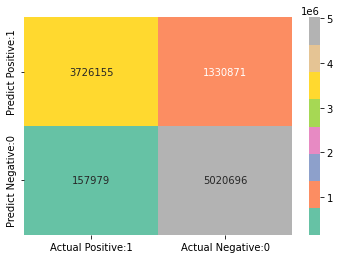

In [19]:
# Print the Confusion Matrix for the train and slice it into four pieces

cm = confusion_matrix(y_train, y_pred_train)

print('Confusion matrix for the train\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='Set2')

Confusion matrix for the test

 [[ 931691  333263]
 [  39607 1254365]]

True Positives(TP) =  931691

True Negatives(TN) =  1254365

False Positives(FP) =  333263

False Negatives(FN) =  39607


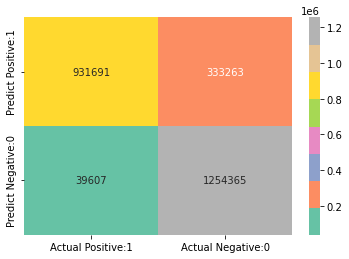

In [20]:
# Print the Confusion Matrix for the test and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix for the test\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])

sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='Set2')

Precision:95.9223%
Recall:73.6541%


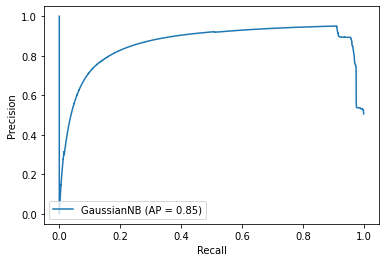

In [21]:
#calculating precision and recall for the test split 
precision = precision_score(y_test, y_pred_test,pos_label='Benign')
recall = recall_score(y_test, y_pred_test,pos_label='Benign')

print('Precision:{0:0.4f}%'. format(precision*100))
print('Recall:{0:0.4f}%'. format(recall*100))

#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(classifier, X_test, y_test)

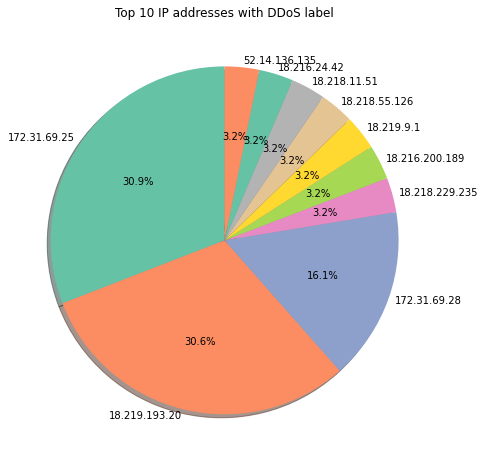

In [22]:
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")[:10]
plt.pie(IPcount, labels=IPs,autopct='%1.1f%%',shadow=True, startangle=90,labeldistance=1.04,colors=colors)
plt.title('Top 10 IP addresses with DDoS label')
plt.show()